In [129]:
import math 
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [130]:
# Get stock quote 

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-12-17')
#show teh data 
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2021-08-26,149.119995,147.509995,148.350006,147.539993,48597200.0,147.539993
2021-08-27,148.750000,146.830002,147.479996,148.600006,55721500.0,148.600006
2021-08-30,153.490005,148.610001,149.000000,153.119995,90956700.0,153.119995


In [131]:
#Get rows and colums of the data sets 

df.shape 



(2433, 6)

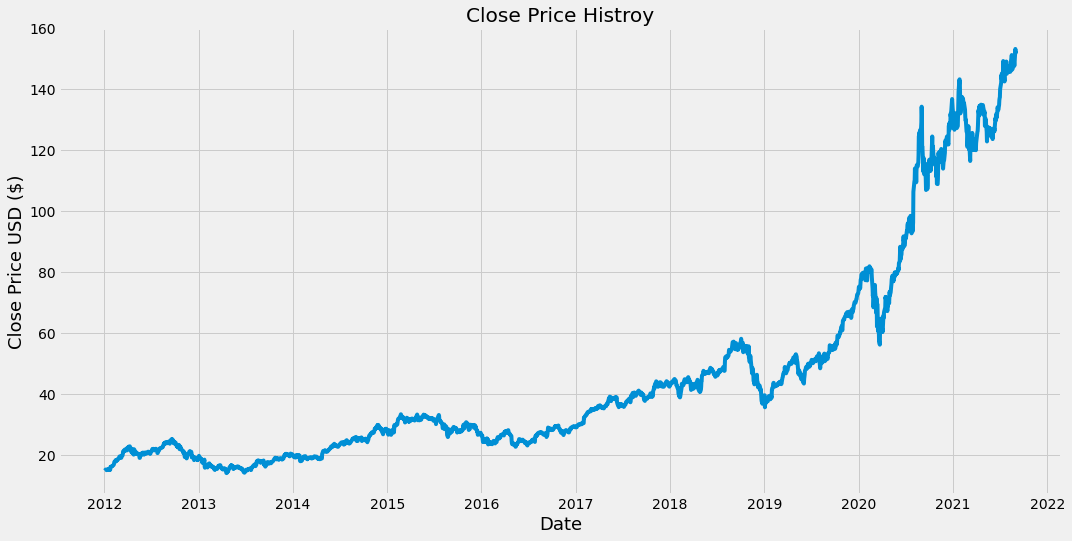

In [132]:
#visualize closing price of the data sets 

import matplotlib.pyplot as plt 

plt.figure(figsize=(16,8))
plt.title('Close Price Histroy')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()



In [133]:
# create a mew dataframe with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array 
dataset = data.values 
# get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len


1947

In [134]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data 



array([[0.00531201],
       [0.00587913],
       [0.00705702],
       ...,
       [1.        ],
       [0.99073098],
       [0.99561695]])

In [135]:
#create the training data set 
#create the scaled training data set 
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print() 


[array([0.00531201, 0.00587913, 0.00705702, 0.00817844, 0.00800651,
       0.008394  , 0.00821693, 0.00791925, 0.00751379, 0.00876866,
       0.00990036, 0.00955135, 0.00763954, 0.0094641 , 0.00766777,
       0.01440401, 0.01388308, 0.01456312, 0.01603354, 0.01692401,
       0.01684959, 0.01657501, 0.01774519, 0.01884608, 0.02009326,
       0.02210772, 0.02633936, 0.02640351, 0.02875928, 0.03051968,
       0.02749415, 0.02865919, 0.0286361 , 0.03190286, 0.03143837,
       0.03229804, 0.03384289, 0.03470257, 0.03717894, 0.03898296,
       0.0395039 , 0.03968611, 0.03660155, 0.03585735, 0.0359677 ,
       0.0388675 , 0.03968354, 0.04143625, 0.04556781, 0.05107998,
       0.05004837, 0.05005094, 0.05403623, 0.05528341, 0.05439549,
       0.05358459, 0.05274031, 0.05554514, 0.05746979, 0.05827558])]
[0.05628420912076752]

[array([0.00531201, 0.00587913, 0.00705702, 0.00817844, 0.00800651,
       0.008394  , 0.00821693, 0.00791925, 0.00751379, 0.00876866,
       0.00990036, 0.00955135, 0.00

In [136]:
#convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [137]:
#reshape data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1887, 60, 1)

In [138]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [139]:
#compile model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [140]:
# train model 
model.fit(x_train, y_train, batch_size=1, epochs=1)


1887/1887 [==============================] - 72s 36ms/step - loss: 1.9179e-04


In [141]:
#create testing data set 
#create a new array containing scaled values from index 1543 - 2003

test_data = scaled_data[training_data_len - 60: , :]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    


In [142]:
#convert data to numpy array 
x_test = np.array(x_test)


In [143]:
#reshape data sets 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [144]:
# get models predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [145]:
#get the root mean squared error 

rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

47.62131662721987

C:\Users\da-92\AppData\Local\Temp/ipykernel_644/151869715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


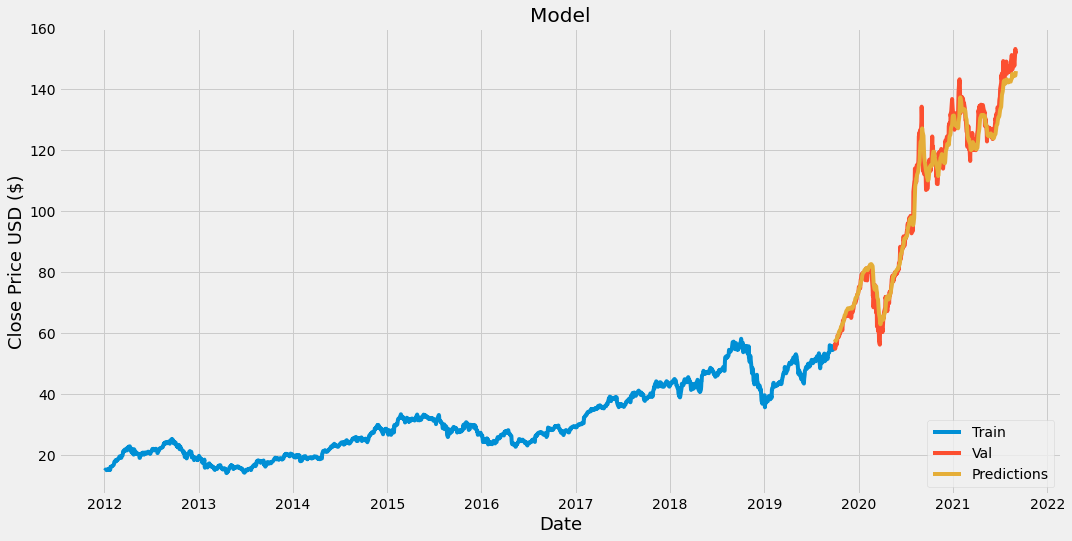

In [161]:

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [147]:

#Build the LTSM model 
model = Sequential()
model.add(LTSM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LTSM(50, return_sequences= False))
mdoel.add(Dense(25))
model.add(Dense(1))


NameError: name 'LTSM' is not defined

In [ ]:
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')